In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

import os
import math

In [2]:
PATH=Path(r"C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist")

In [3]:
list(PATH.iterdir())

[WindowsPath('C:/Users/Mertttt/Desktop/102_bootcamp/data/data_mnist/mnist/train'),
 WindowsPath('C:/Users/Mertttt/Desktop/102_bootcamp/data/data_mnist/mnist/validation')]

In [4]:
image=Image.open(r"C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\4\img_11265.jpg")

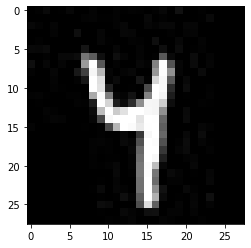

In [5]:
plt.imshow(image,cmap="gray")

In [6]:
Path.ls= lambda x:list(x.iterdir())

In [9]:
(PATH).ls()

[WindowsPath('C:/Users/Mertttt/Desktop/102_bootcamp/data/data_mnist/mnist/train'),
 WindowsPath('C:/Users/Mertttt/Desktop/102_bootcamp/data/data_mnist/mnist/validation')]

In [20]:
def log_softmax(x): 
    return (x.exp()/(x.exp().sum(-1,keepdim=True)) + 1e-20).log()

def nll(preds, actuals): 
    return -preds[range(actuals.shape[0]), actuals].mean()

def validation_acc(model):
    return torch.stack([accuracy(model(xb), yb) for xb, yb in valid_dl]).mean().item()

def accuracy(preds, yb): 
    return (torch.argmax(preds, dim=1, keepdim = True)==yb).float().mean()

def loss_func(preds, targets):
    preds = log_softmax(preds)
    return nll(preds, targets)

def train(model, epochs=5, valid_epoch=5):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            
            preds = model(xb)
            loss = loss_func(preds, yb.squeeze())
            loss.backward()
            optim.step()
            optim.zero_grad()
        
        if epoch % valid_epoch == 0:
            print(validation_acc(model))
            
            
def _get_files(p, fs, extensions = None):
    p = Path(p) # to support / notation
    res = [p/f for f in fs if not f.startswith(".") 
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

class Dataset():
    def __init__(self, x, y): 
        self.x,self.y = x,y
    def __len__(self): 
        return len(self.x)
    def __getitem__(self, i): 
        return self.x[i],self.y[i]


class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)

        
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]
            
def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            l = [np.array(Image.open(e)).reshape(28*28)]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)


In [28]:
trn_x, trn_y = create_ds_from_file(PATH/"train")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\9


In [29]:
val_x,val_y = create_ds_from_file(PATH/"validation")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\9


In [23]:
mean = trn_x.mean()
std = trn_x.std()

trn_x = (trn_x - mean) / std
val_x = (val_x - mean) / std
mean, std, trn_x.mean(), trn_x.std(), val_x.mean(), val_x.std()

(tensor(34.3409),
 tensor(77.5014),
 tensor(2.2117e-05),
 tensor(1.0000),
 tensor(0.0042),
 tensor(1.0038))

In [24]:
train_ds = Dataset(trn_x, trn_y)
valid_ds = Dataset(val_x,val_y)

train_dl = DataLoader(train_ds, 256)
valid_dl = DataLoader(valid_ds, 256)

In [25]:
model = nn.Sequential(
    nn.Linear(784,60),
    nn.ReLU(),
    nn.Linear(60,10)
)

In [26]:
optim = torch.optim.SGD(model.parameters(), lr=0.001)

In [27]:
train(model,50,5)

0.3075036406517029
0.7509084343910217
0.8294876217842102
0.8532885313034058
0.8696402907371521
0.8766351938247681
0.8825399875640869
0.8868095874786377
0.8887172937393188
0.8899890780448914


### Applying edge detection

In [58]:
kernel = np.array([-1,1])
out = np.zeros((28,27))
def conv(img, kernel):
    
    out = np.zeros(img.shape)
    img = np.pad(img,[(0, 0), (0, 1)],"edge") # This will do the padding for not to reduce size
    
    for i in range(img.shape[0]):
    
        for j in range(img.shape[1]-1):
            out[i][j] = abs((img[i][j:j+2] * kernel).sum())
    
    return out

def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            l = [conv(np.array(Image.open(e)), kernel).reshape(28*28)]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

In [59]:
trn_x_f, trn_y_f = create_ds_from_file(PATH/"train")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\9


In [60]:
val_x_f,val_y_f = create_ds_from_file(PATH/"validation")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\9


In [49]:
trn_x_f[3].shape

torch.Size([784])

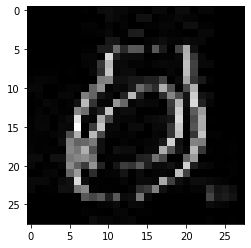

In [50]:
plt.imshow(trn_x_f[6].view(28,28), cmap = "gray");

In [51]:
mean_f = trn_x_f.mean()
std_f = trn_x_f.std()

trn_x_f=(trn_x_f-mean_f)/std_f

val_x_f = (val_x_f-mean_f)/std


In [61]:
train_ds = Dataset(trn_x_f, trn_y_f)
valid_ds = Dataset(val_x_f,val_y_f)
train_dl = DataLoader(train_ds, 256)
valid_dl = DataLoader(valid_ds, 256)

In [62]:
model = nn.Sequential(
    nn.Linear(784,60),
    nn.ReLU(),
    nn.Linear(60,10)
)

In [63]:
optim = torch.optim.SGD(model.parameters(), lr=0.001)

In [64]:
train(model,50,5)

0.6894985437393188
0.8454760313034058
0.8688226938247681
0.8843568563461304
0.8860828280448914
0.8897165656089783
0.8977107405662537
0.8999818563461304
0.9030705094337463
0.9040697813034058


### Feeding both features we extracted with edge detection and raw pixel images

In [65]:
def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            img = np.array(Image.open(e))
            l = [np.concatenate((conv(img, kernel).reshape(-1), img.reshape(-1)))]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

In [74]:
trn_x_double, trn_y_double = create_ds_from_file(PATH/"train")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\9


In [75]:
val_x_double,val_y_double = create_ds_from_file(PATH/"validation")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\9


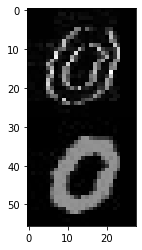

In [99]:
plt.imshow(trn_x_do[0].view(56,28), cmap = "gray");

In [77]:
mean_raw = trn_x_double[:,0:784].mean()
std_raw = trn_x_double[:,0:784].std()

trn_x_double[:,0:784] = (trn_x_double[:,0:784] - mean_raw) / std_raw
mean_raw, std_raw, trn_x_double[:,0:784].mean(), trn_x_double[:,0:784].std()

(tensor(18.2777), tensor(44.2487), tensor(2.3223e-05), tensor(1.))

In [78]:
mean_filt = trn_x_double[:,784:].mean()
std_filt = trn_x_double[:,784:].std()

trn_x_double[:,784:] = (trn_x_double[:,784:] - mean_filt) / std_filt
mean_filt, std_filt, trn_x_double[:,784:].mean(), trn_x_double[:,784:].std()

(tensor(34.3391), tensor(77.5014), tensor(5.1496e-05), tensor(1.0000))

In [89]:
trn_x_double.shape, trn_y_double.shape, val_x_double.shape, val_y_double.shape

(torch.Size([31216, 1568]),
 torch.Size([31216, 1]),
 torch.Size([10784, 1568]),
 torch.Size([10784, 1]))

In [94]:
train_ds_double = Dataset(trn_x_double, trn_y_double)
valid_ds_double = Dataset(val_x_double,val_y_double)
train_dl_double = DataLoader(train_ds, 256)
valid_dl_double = DataLoader(valid_ds, 256)

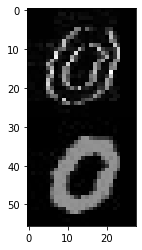

In [95]:
plt.imshow(trn_x_double[0].view(56,28), cmap = "gray");

In [96]:
model = nn.Sequential(
    nn.Linear(56*28,60),
    nn.ReLU(),
    nn.Linear(60,10)
)

In [97]:
optim = torch.optim.SGD(model.parameters(), lr=0.001)

In [98]:
train(model,50,5)

RuntimeError: size mismatch, m1: [256 x 784], m2: [1568 x 60] at ..\aten\src\TH/generic/THTensorMath.cpp:41

### Let's try different things on cnn model

In [100]:
def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            l = [np.array(Image.open(e)).reshape(28*28)]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

In [101]:
trn_x, trn_y = create_ds_from_file(PATH/"train")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\train\9


In [102]:
val_x,val_y = create_ds_from_file(PATH/"validation")

C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\0
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\1
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\2
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\3
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\4
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\5
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\6
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\7
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\8
C:\Users\Mertttt\Desktop\102_bootcamp\data\data_mnist\mnist\validation\9


In [103]:
# there is little error here, can you spot it ?
mean = trn_x.mean()
std = trn_x.std()

trn_x=(trn_x-mean)/std
mean, std, trn_x.mean(), trn_x.std()

(tensor(34.3409), tensor(77.5014), tensor(2.2117e-05), tensor(1.0000))

In [104]:
val_x = (val_x-mean)/std
val_x.mean(), val_x.std()

(tensor(0.0042), tensor(1.0038))

In [124]:
class Dataset():
    def __init__(self, x, y): 
        self.x,self.y = x,y
    def __len__(self): 
        return len(self.x)
    def __getitem__(self, i): 
        return self.x[i].view(-1,1,28,28),self.y[i]


class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)

        
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

In [125]:
train_ds = Dataset(trn_x, trn_y)
valid_ds = Dataset(val_x,val_y)

In [126]:
train_dl = DataLoader(train_ds, 256)
valid_dl = DataLoader(valid_ds, 256)

In [127]:
import torch.nn.functional as F

In [128]:
class Func(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x): 
        return self.func(x)
def flatten(x):      
    return x.view(x.shape[0], -1)

In [129]:
def print_t(x):      
    print(x.shape)
    return x

In [130]:
model = nn.Sequential(
        nn.Conv2d(1, 8, 5, padding=2,stride=2), nn.ReLU(), #14
        nn.Conv2d(8, 16, 3, padding=1,stride=2), nn.ReLU(), # 7
        nn.Conv2d(16, 32, 3, padding=1,stride=2), nn.ReLU(), # 4
        nn.Conv2d(32, 32, 3, padding=1,stride=2), nn.ReLU(), # 2
        #Func(print_t),
        nn.AdaptiveAvgPool2d(1),
        Func(flatten),
        nn.Linear(32,10)
)

In [131]:
optim = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-3)

In [132]:
train(model,80,10)

0.10183502733707428
0.2291969507932663
0.871911346912384
0.9152434468269348
0.934138834476471
0.9435864686965942
0.9495820999145508
0.9546693563461304


In [133]:
model = nn.Sequential(
        nn.Conv2d(1, 16, 3, padding=1,stride=2), nn.ReLU(), #14
        nn.Conv2d(16, 32, 3, padding=1,stride=2), nn.ReLU(), # 7
        nn.Conv2d(32, 64, 3, padding=1,stride=2), nn.ReLU(), # 4
        nn.Conv2d(64, 64, 3, padding=1,stride=2), nn.ReLU(), # 2
        #Func(print_t),
        nn.AdaptiveAvgPool2d(1),
        Func(flatten),
        nn.Linear(32,10)
)

In [134]:
optim = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-3)

In [136]:
train(model,80,10)

RuntimeError: size mismatch, m1: [256 x 64], m2: [32 x 10] at ..\aten\src\TH/generic/THTensorMath.cpp:41